In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
magic_gamma_telescope = fetch_ucirepo(id=159)


In [ ]:

# data (as pandas dataframes)
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

# metadata
print(magic_gamma_telescope.metadata)

# variable information
print(magic_gamma_telescope.variables)


{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

In [ ]:
X

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  
0       -8.2027  40.0920   81.8828  
1       -9.9574   6.3609  205.2610  
2      -45.2160  76.9600  256.7880  
3       -7.1513  10.4490  116.7370  
4       21.8393   4.6480  356.4620  
...         ...      ...       ...  
19015    2.8766   2.4229  106.8258  
19016   -2.9632  86.7975  247.4560  
19017   -9.4662  30.2987  256.5166  
19018  -63.8389  84.6874  408.3166  
19019   31.4755  52.7310  272.3174  

[19020 rows x 10 columns]

In [ ]:
y

class
0         g
1         g
2         g
3         g
4         g
...     ...
19015     h
19016     h
19017     h
19018     h
19019     h

[19020 rows x 1 columns]

In [ ]:
mapping={
    'g':0,
    'h':1
}
y.loc[:, 'class'] = y['class'].map(mapping)

In [ ]:
y

class
0         0
1         0
2         0
3         0
4         0
...     ...
19015     1
19016     1
19017     1
19018     1
19019     1

[19020 rows x 1 columns]

In [ ]:
y=y['class'].to_numpy()
y.astype(int)
y=pd.Series(y)

<Axes: title={'center': "Class Distribution After Sampling| 0:Gamma | 1 : Hadron'"}>

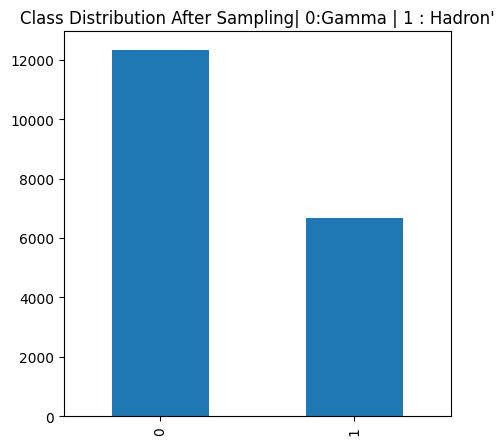

In [ ]:
plt.figure(figsize=(5,5))

y.value_counts().plot(kind = "bar", title = "Class Distribution After Sampling| 0:Gamma | 1 : Hadron'")

In [ ]:
y=y.astype(int)

In [ ]:
# Create balance in the data
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


<Axes: title={'center': "Class Distribution After Sampling| 0:Gamma | 1: Hadron'"}>

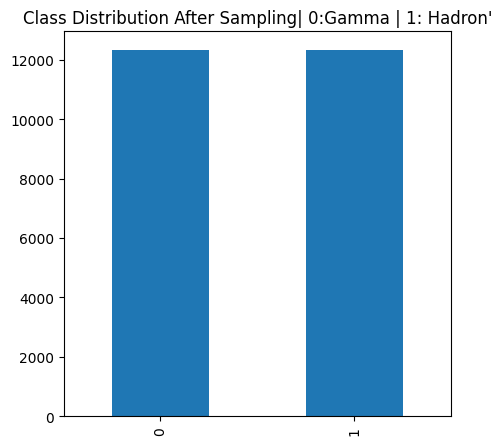

In [ ]:
plt.figure(figsize=(5,5))

y_resampled.value_counts().plot(kind = "bar", title = "Class Distribution After Sampling| 0:Gamma | 1: Hadron'")

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [ ]:
#Feature Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = sc.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [ ]:
X_train_sc

fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
0      2.558123  0.127712  0.765844 -1.148767 -1.130271 -1.417318 -1.196644   
1     -0.714521 -0.592920 -0.525614  0.631818  0.837314  0.282580  0.124092   
2     -0.212087 -0.178247  0.860366 -0.905688 -0.856723  0.385624 -0.723610   
3     -0.575366 -0.468519 -0.510452 -0.132707 -0.234798  0.461503  0.242336   
4      1.567433  0.142429  0.192269 -0.450900 -0.394007  1.708811  1.919426   
...         ...       ...       ...       ...       ...       ...       ...   
19726 -0.802462 -0.615075 -1.040444  1.376676  1.471989 -0.193538 -0.371548   
19727 -0.795072 -0.562597 -0.863552  1.050528  1.643559  0.372204  0.157686   
19728 -0.550224 -0.009564  0.199584 -0.461565 -0.392077 -0.019268  0.220385   
19729 -0.134170 -0.637316 -0.673782 -0.075894 -0.265355  1.102378  0.677971   
19730 -0.105174 -0.562114 -0.113266 -0.139248 -0.334094 -0.243488 -1.037445   

       fM3Trans    fAlpha     fDist  
0      0.615037  0.980542  0.906443  
1     -0.327293  0.812849 -0.209162  
2     -0.609988 -1.039064  0.239707  
3      0.408034 -0.838447 -0.898260  
4     -0.151806  0.077259  1.013079  
...         ...       ...       ...  
19726  0.409483  0.922967  0.286181  
19727  0.399337 -0.695192 -0.020634  
19728  0.833802  1.813960 -2.253350  
19729 -0.596820  1.056555 -0.484578  
19730  0.354484  2.124146 -0.130456  

[19731 rows x 10 columns]

Logistic Regression

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train_sc,y_train)

y_pred=model.predict(X_test_sc)


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.7703223190756132
[[2045  453]
 [ 680 1755]]


Random Forest Classifier

In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_sc,y_train)
y_pred=rf.predict(X_test_sc)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.8870869653354957
[[2261  237]
 [ 320 2115]]


Decision Trees

In [ ]:
dc = DecisionTreeClassifier(random_state = 0)
dc.fit(X_train_sc,y_train)
y_pred = dc.predict(X_test_sc)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.8289073586053112
[[2052  446]
 [ 398 2037]]


In [ ]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_classifier.fit(X_train_sc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_classifier.predict(X_test_sc)

accuracy=accuracy_score(y_test,y_pred)

print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.8580985201702818
[[2235  263]
 [ 437 1998]]


Neural Network

In [ ]:
model=Sequential(
    [
        Dense(128,activation='relu',input_shape=(X_train_sc.shape[1],)),
        Dense(64,activation='relu'),
        Dense(32,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test_sc,y_test))

y_pred = (model.predict(X_test_sc) > 0.8).astype('int32')
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test,y_pred))

Epoch 1/10
617/617 [==============================] - 3s 3ms/step - loss: 0.5973 - accuracy: 0.7189 - val_loss: 0.6932 - val_accuracy: 0.5157
Epoch 2/10
617/617 [==============================] - 2s 2ms/step - loss: 0.4850 - accuracy: 0.7600 - val_loss: 0.7090 - val_accuracy: 0.5108
Epoch 3/10
617/617 [==============================] - 1s 2ms/step - loss: 0.4647 - accuracy: 0.7733 - val_loss: 0.7277 - val_accuracy: 0.5078
Epoch 4/10
617/617 [==============================] - 2s 3ms/step - loss: 0.4512 - accuracy: 0.7759 - val_loss: 0.7546 - val_accuracy: 0.5070
Epoch 5/10
617/617 [==============================] - 2s 3ms/step - loss: 0.4407 - accuracy: 0.7853 - val_loss: 0.7784 - val_accuracy: 0.5064
Epoch 6/10
617/617 [==============================] - 1s 2ms/step - loss: 0.4351 - accuracy: 0.7878 - val_loss: 0.8048 - val_accuracy: 0.5064
Epoch 7/10
617/617 [==============================] - 1s 2ms/step - loss: 0.4284 - accuracy: 0.7914 - val_loss: 0.8125 - val_accuracy: 0.5064
Epoch 

Naive Bayes

In [ ]:
nb=GaussianNB()
nb.fit(X_train_sc,y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test_sc)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

cm=confusion_matrix(y_test,y_pred)
print(cm)

Accuracy: 0.6474761808230286
[[2222  276]
 [1463  972]]


KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knn.fit(X_train_sc,y_train)
y_pred=knn.predict(X_test_sc)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)
print(confusion_matrix(y_test,y_pred))

0.8530306101763633
[[2169  329]
 [ 396 2039]]
